#### The XOR problem and the perceptron

A single perceptron can be used to solve the XOR problem. The inability of the perceptron to solve the XOR is due to the fact that a single the perceptron is only capable of classifying linearly separable data and the XOR problem is not.

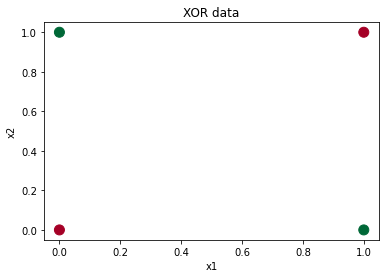

In [8]:
#Create a matrix for the XOR problem
import numpy as np
xor_data = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])

#plot the data
import matplotlib.pyplot as plt
plt.scatter(xor_data[:,0],xor_data[:,1],s=100,c=xor_data[:,2],marker='o',cmap=plt.cm.RdYlGn);

# set axis labels
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR data')
plt.show()


In [27]:
# Print xor data as a pandas dataframe
import pandas as pd
xor_df = pd.DataFrame(xor_data, columns=['x1','x2','y'])
xor_df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [14]:
import numpy as np
class PerceptronNonTrainable:
    def __init__(self, w, b):
        self.w = np.array(w, dtype=np.float64)
        self.b = np.float64(b)
     
    # This is a vectorized operation over a matrix
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

    # This is also a vectorized operation over a matrix
    def net_input(self, X):
        return np.dot(X, self.w) + self.b    

    def __call__(self, X):
        return self.predict(X)    

### Multi layer perceptron network architecture
![Image that shows the network architecture](img/xor_mlp.png "XOR network architecture")
<style type="text/css">
    img {
        width: 450px;
    }
</style>

In [24]:
or_perceptron =  PerceptronNonTrainable([1,1], -0.5)
and_perceptron = PerceptronNonTrainable([1,1], -1.5)
out_perceptron = PerceptronNonTrainable([1,-1],-0.5)

def xor_multilayer_perceptron(X):
    layer0_out = np.column_stack((or_perceptron(X),and_perceptron(X)))
    return out_perceptron(layer0_out)
    

#### Verifying the correctness of the XOR multilayer perceptron

In [26]:
xor_multilayer_perceptron(xor_data[:,0:2]) == xor_data[:,2]

array([ True,  True,  True,  True])